In [10]:
import sys
sys.path.append("..")
%load_ext autoreload
%autoreload 2
import cbc, numpy as np, scipy as sp, matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
waist, f, ap = 1.3e-6, 2.0, 9e-2
wavelength = 1.5e-7
a, b, c = 2e-6, 2e-6, 3e-6
Nx, Ny, Nz = 60, 60, 1

detNx, detNy = 512, 512
pix_size = 55e-3 / 2
det_dist = 30

In [12]:
cbeam = cbc.CircBeam(f, ap, wavelength)
cdiff = cbc.Diff(beam=cbeam,
                det_args=cbc.DetArgs(det_dist=det_dist, detNx=detNx, detNy=detNy, pix_size=pix_size),
                lat_args=cbc.LatArgs(a=a, b=b, c=c, Nx=Nx, Ny=Ny, Nz=Nz))

rbeam = cbc.RectBeam(f, ap, wavelength)
rdiff = cbc.Diff(beam=rbeam,
                det_args=cbc.DetArgs(det_dist=det_dist, detNx=detNx, detNy=detNy, pix_size=pix_size),
                lat_args=cbc.LatArgs(a=a, b=b, c=c, Nx=Nx, Ny=Ny, Nz=Nz))

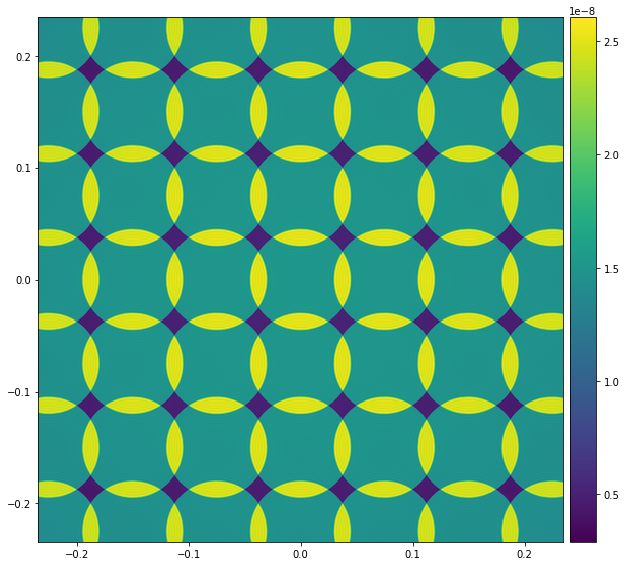

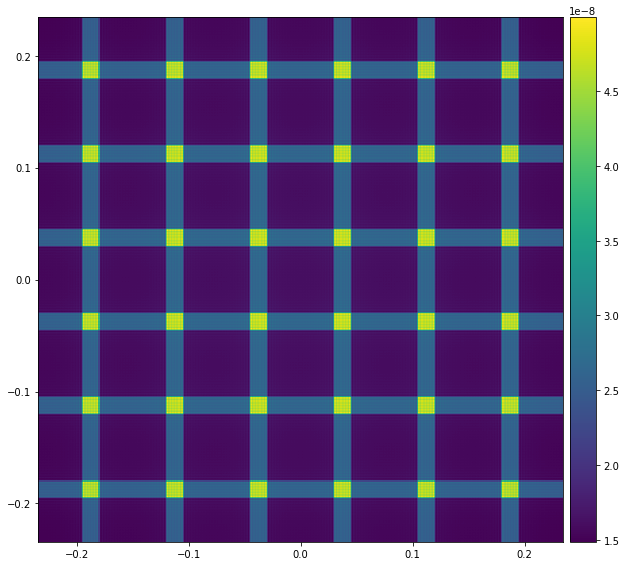

In [13]:
cdiff.move_lat([0.501 * a, 0.501 * b, 1e-6])
rdiff.move_lat([0.501 * a, 0.501 * b, 1e-6])
cdiff.henry().pool().plot()
rdiff.henry().pool().plot()

In [ ]:
movdiff = cbc.Diff(beam=cbeam,
                det_args=cbc.DetArgs(det_dist=det_dist, detNx=128, detNy=128, pix_size=pix_size),
                lat_args=cbc.LatArgs(a=a, b=b, c=c, Nx=Nx, Ny=Ny, Nz=Nz))

frames = []
for i in range(100):
    pos = 1e-4 * a + 1e-2 * a * i
    movdiff.move_lat([pos, 0.5001 * b, 1e-6])
    frames.append(np.abs(movdiff.henry().pool().res))
np.save('frames2', np.array(frames))

In [20]:
movdiff = cbc.Diff(beam=cbeam,
                det_args=cbc.DetArgs(det_dist=det_dist, detNx=128, detNy=128, pix_size=pix_size),
                lat_args=cbc.LatArgs(a=a, b=b, c=c, Nx=Nx, Ny=Ny, Nz=Nz))

defocs = np.linspace(1e-6, 1e-3, num=100)
frames = []
for i in range(100):
    movdiff.move_lat([0.5001 * a, 0.5001 * b, defocs[i]])
    frames.append(np.abs(movdiff.henry().pool().res))
np.save('frames4', np.array(frames))

In [27]:
pos = np.linspace(0, 1, num=100)
defocs = np.linspace(1e-6, 1e-3, num=100)
frames1 = np.load("frames2.npy")
frames2 = np.load("frames4.npy")

In [21]:
%matplotlib agg

from matplotlib import animation, rc
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import HTML

rc('animation', html='html5')

cdiff.move_lat([0.5001 * a, 0.5001 * b, 1e-6])
kxs, kys = cdiff.henry().kxs, cdiff.henry().kys

fig, ax = plt.subplots(figsize=(10,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
im = ax.imshow([[]], extent = [kxs.min(), kxs.max(), kys.min(), kys.max()],
                interpolation='nearest', origin='lower')
im.set_clim(np.min(frames), np.max(frames))
fig.colorbar(im, cax=cax, orientation='vertical')

In [33]:
def init():
    im.set_data([[]])
    return im,

def animate1(i):
    ax.set_title("x = {0:.2f} a".format(pos[i]))
    im.set_data(frames1[i])
    return im,

anim1 = animation.FuncAnimation(fig, animate1, init_func=init, interval=100, frames=100, blit=True)
anim1.save('anim1.mp4', extra_args=['-vcodec', 'libx264'])
HTML(anim1.to_html5_video())

In [34]:
def init():
    im.set_data([[]])
    return im,

def animate2(i):
    ax.set_title("defocus = {0:.2e} mm".format(defocs[i]))
    im.set_data(frames2[i])
    return im,

anim2 = animation.FuncAnimation(fig, animate2, init_func=init, interval=100, frames=100, blit=True)
anim2.save('anim2.mp4', extra_args=['-vcodec', 'libx264'])
HTML(anim2.to_html5_video())

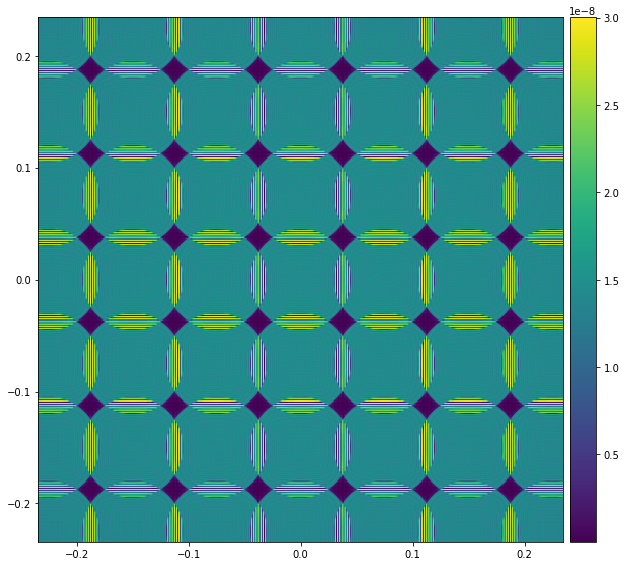

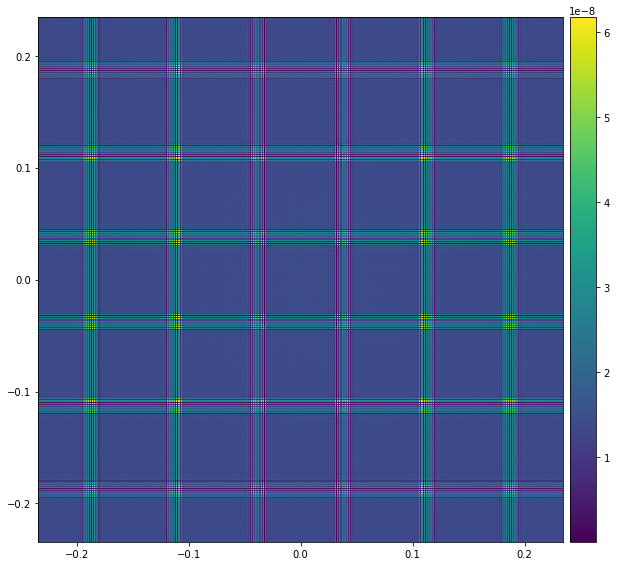

In [28]:
cdiff.move_lat([0.501 * a, 0.501 * b, 1e-3])
rdiff.move_lat([0.501 * a, 0.501 * b, 1e-3])
cdiff.henry().pool().plot()
rdiff.henry().pool().plot()

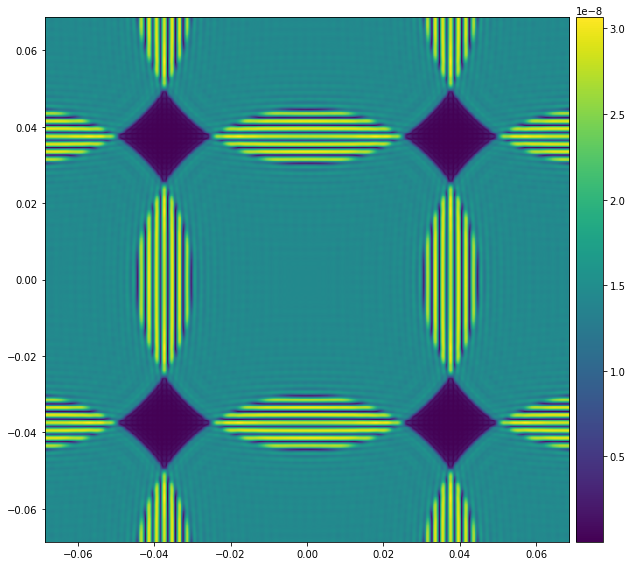

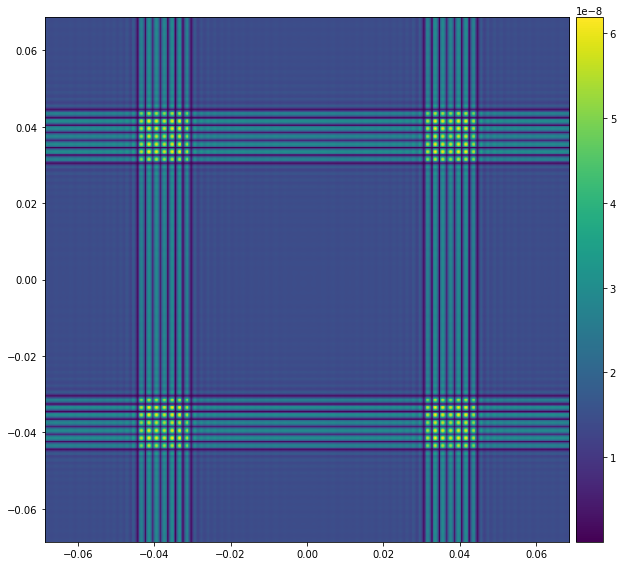

In [29]:
cdiff.det_args.pix_size = 55e-3 / 8
cdiff.det_args.detNx = 600; cdiff.det_args.detNy = 600
cdiff.henry().pool().plot()
rdiff.det_args.pix_size = 55e-3 / 8
rdiff.det_args.detNx = 600; rdiff.det_args.detNy = 600
rdiff.henry().pool().plot()

In [30]:
gbeam = cbc.GausBeam(waist, wavelength)
gdiff = cbc.Diff(beam=gbeam,
                det_args=cbc.DetArgs(det_dist=det_dist, detNx=detNx, detNy=detNy, pix_size=pix_size),
                lat_args=cbc.LatArgs(a=a, b=b, c=c, Nx=Nx, Ny=Ny, Nz=Nz))

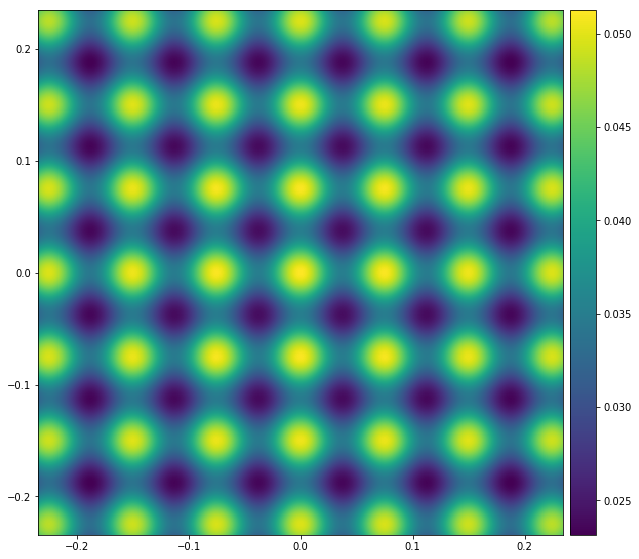

In [31]:
gdiff.move_lat([0.501 * a, 0.501 * b, 1e-6])
gdiff.henry().pool().plot()

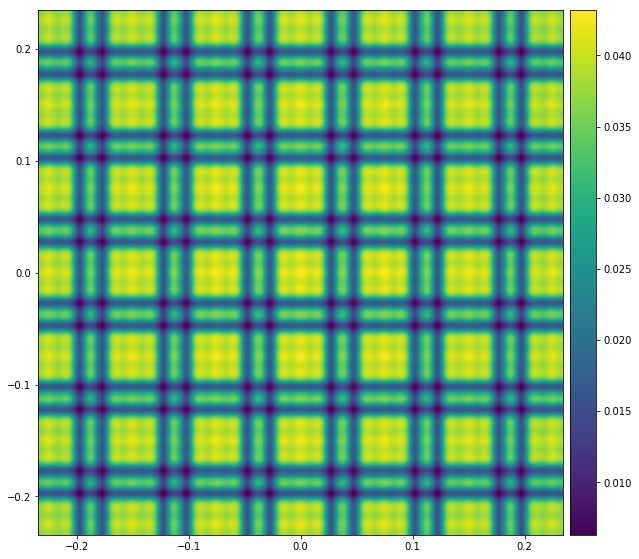

In [32]:
gdiff.move_lat([0.501 * a, 0.501 * b, 1e-4])
gdiff.henry().pool().plot()